# Carve up Spatiotemporal Space with Oriented Gabors

Adelson & Bergen equations dont easily tile spatiotemporal space, so lets start with the simplest thing and extend gabors into space-time. We carve up the spatiotemporal space with gabors, starting in 2d, then 3d

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib import cm
pi = np.pi


In [114]:
#2D Gaussian Filter
def gauss_filter_2d(x,y,mu_x,mu_y,sigma_x,sigma_y,norm=False):
    if norm:
        x_response = 1/(sigma_x*np.sqrt(2*np.pi)) * np.exp(-(mu_x-x)**2/(2*sigma_x**2))
        y_response = 1/(sigma_y*np.sqrt(2*np.pi)) * np.exp(-(mu_y-y)**2/(2*sigma_y**2))
    else:
        x_response = np.exp(-(mu_x-x)**2/(2*sigma_x**2))
        y_response = np.exp(-(mu_y-y)**2/(2*sigma_y**2))
    return(x_response * y_response)

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def polar_gaussian_2d(xs,yx,scale, orientation):
    mu_x, mu_y = pol2cart(scale,orientation)
    filt = gauss_filter_2d(xs,ys,mu_x,mu_y,scale,scale)
    return(filt)

## Plot a Demo

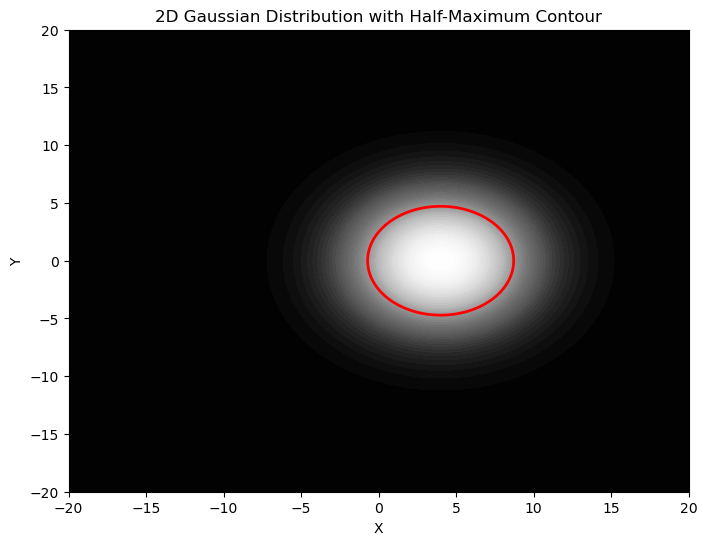

In [148]:
#setup space and time progression
space = np.linspace(-20,20,num=150)
time = np.linspace(-20,20,num=150)
xs,ys = np.meshgrid(space,time)
#pick a scale and orientation
scale = 4
orientation = 0

# Calculate the 2D Gaussian surface
filter = polar_gaussian_2d(xs, ys, scale, orientation)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xs, ys, filter, levels=50, cmap='Greys_r')
# cbar = fig.colorbar(conxstoysr)filter# cbar.set_label('Intensity')

# Add a contour to show where the value is half of the maximum
half_max_contour = ax.contour(xs, ys, filter, levels=[np.max(filter) / 2], colors='red', linestyles='-', linewidths=2)
#ax.clabel(half_max_contour, inline=1, fontsize=10, fmt='Half max: %.2f')

# Additional plot settings
ax.set_title('2D Gaussian Distribution with Half-Maximum Contour')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

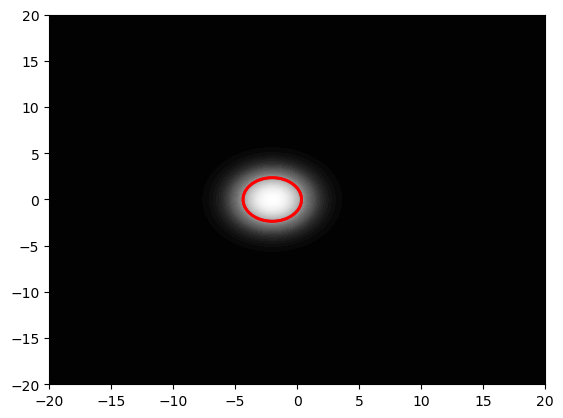

In [151]:
#setup space and time progression
space = np.linspace(-20,20,num=150)
time = np.linspace(-20,20,num=150)
xs,ys = np.meshgrid(space,time)
#pick a scale and orientation
scale = 2
orientation = pi

fix,ax = plt.subplots()
#plot a single filter
filter = polar_gaussian_2d(xs,ys,scale,orientation)
#plot it & half max
contour = ax.contourf(xs, ys, filter, levels=50, cmap='Greys_r')
half_max_contour = ax.contour(xs, ys, filter, levels=[np.max(filter) / 2], colors='red', linestyles='-', linewidths=2)


## Go through a range of scales and orientations and plot them all

/state/partition1/slurm_tmp/26408706.0.0/ipykernel_2990900/1935113799.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(orientations),len(scales),i*len(scales)+j+1, aspect=1)


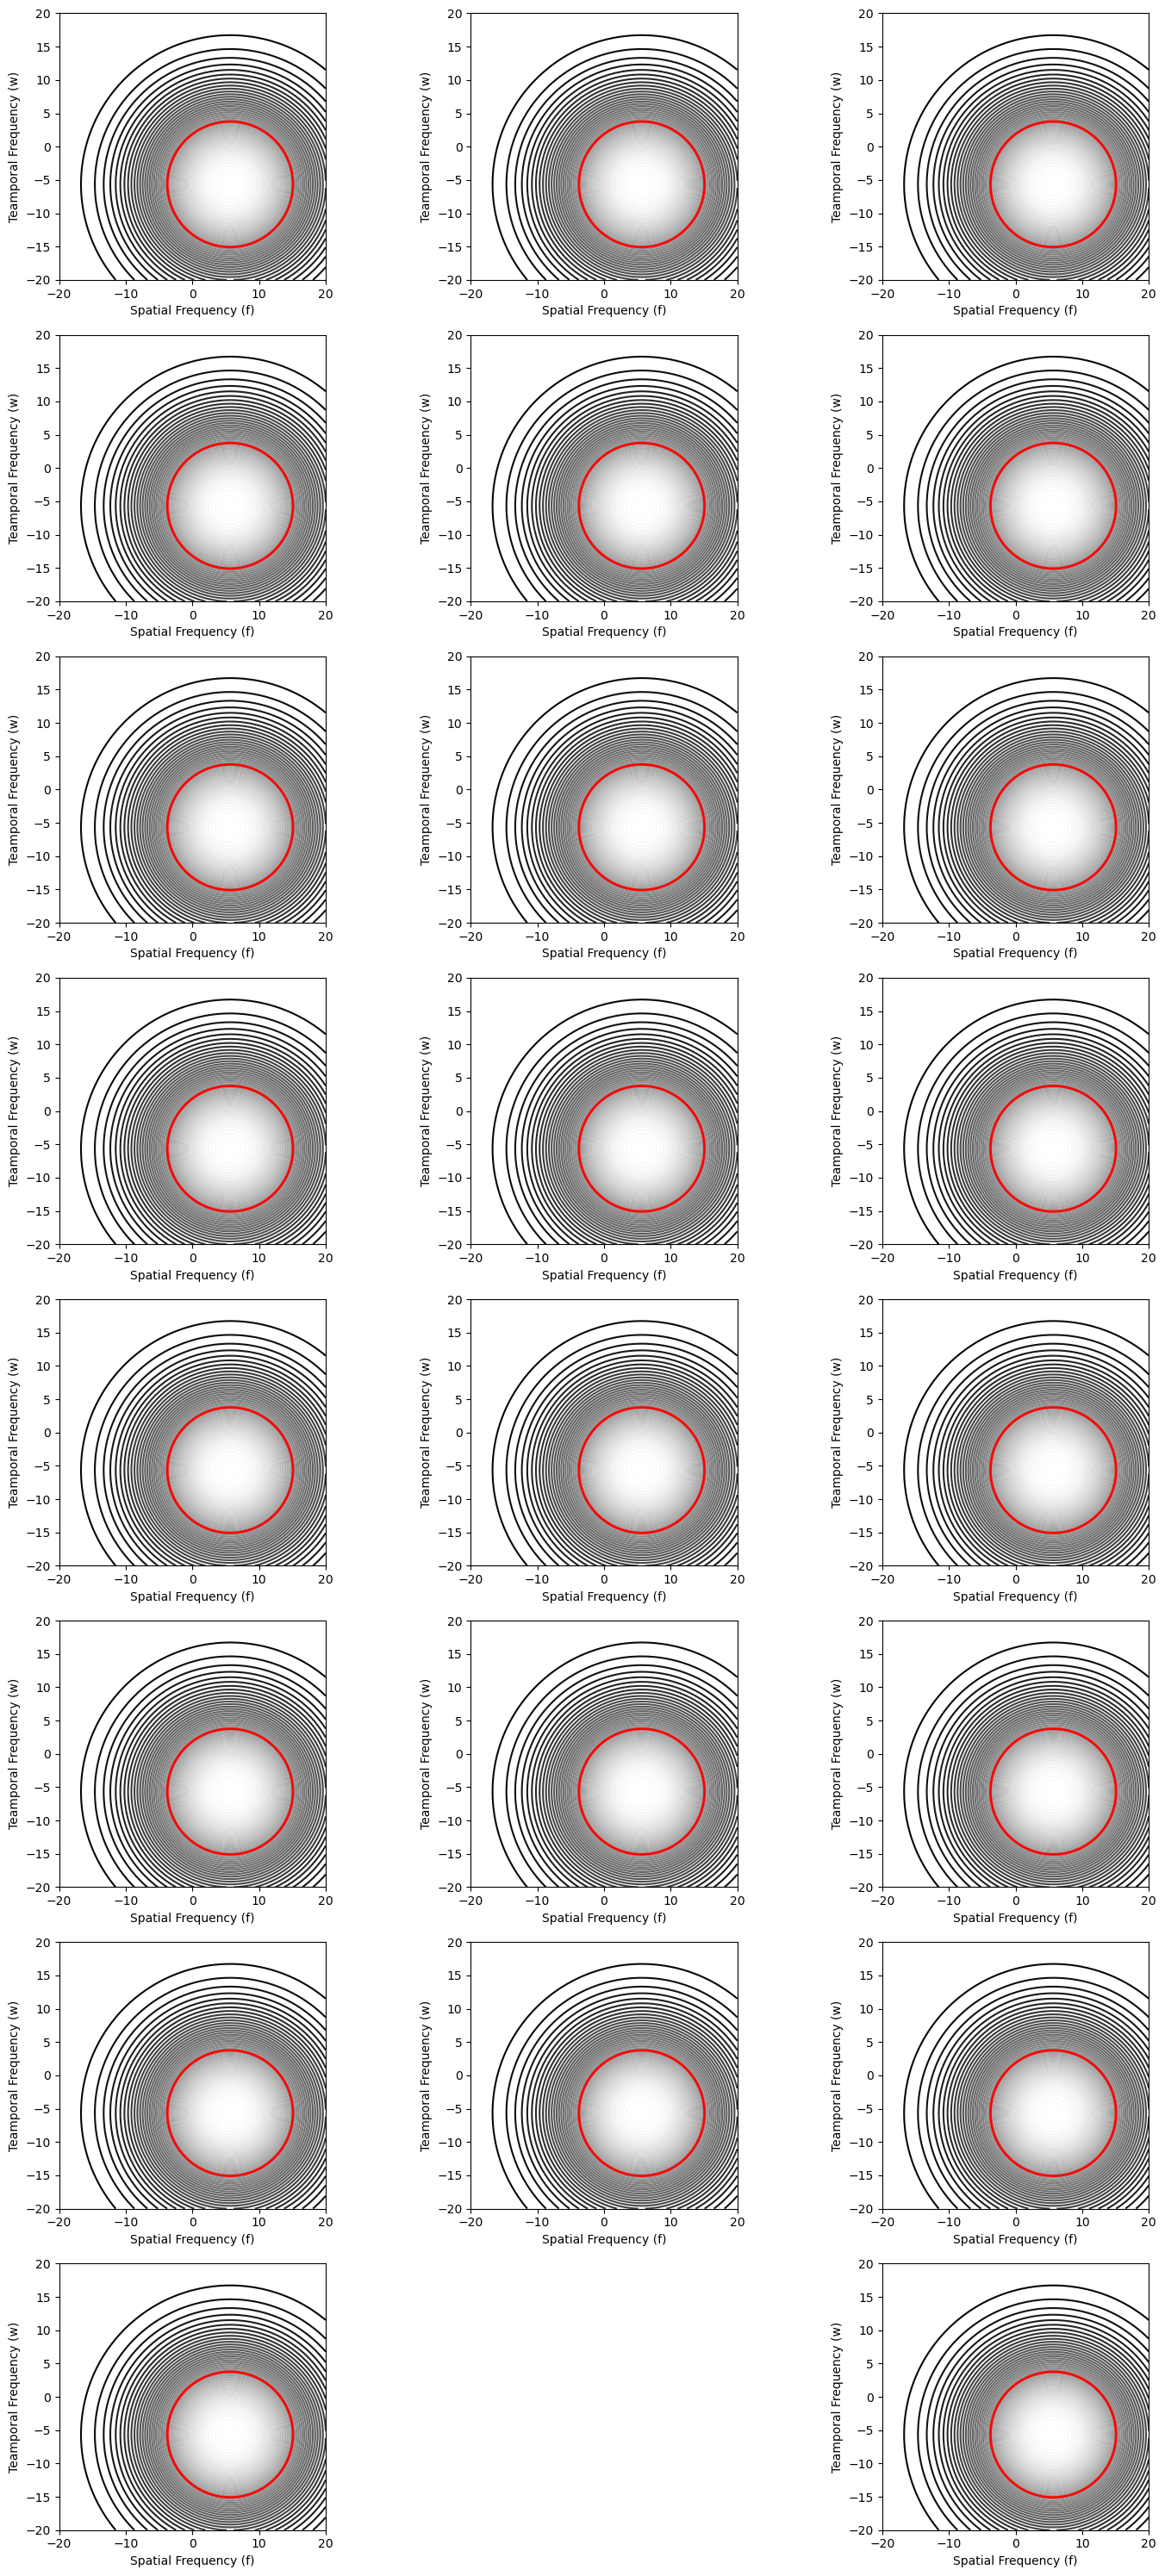

In [158]:
#pick our scales & centers
scales = [2,4,8]
orientations_even = [0,pi/4,pi/2,3*pi/4]
orientations_odd = [pi,5*pi/4,3*pi/2,7*pi/4]
orientations = orientations_even + orientations_odd
#setup space and time progression
space = np.linspace(-20,20,num=150)
time = np.linspace(-20,20,num=150)
xs,ys = np.meshgrid(space,time)

#plot these all
fig,ax = plt.subplots(figsize=(15,30))
for i, orientation in enumerate(orientations):
    for j, scale in enumerate(scales):
        #create filter
        #filter = polar_gaussian_2d(xs,ys,scale,orientation)
        #plot it
        plt.subplot(len(orientations),len(scales),i*len(scales)+j+1, aspect=1)
        plt.contour(xs, ys, filter, levels=50, cmap='Greys_r')
        plt.contour(xs, ys, filter, levels=[np.max(filter) / 2], colors='red', linestyles='-', linewidths=2)
        #plt.pcolormesh(space, time, filter, shading='auto',cmap='Greys_r')
        #plt.fill_between(x, y, where=((x > half_max_x1) & (x < half_max_x2)), color='gray', alpha=0.5, label='FWHM Area')
        #plt.axvline(half_max_x1, color='b', linestyle='--', label='FWHM Boundaries')
        plt.xlabel('Spatial Frequency (f)')
        plt.ylabel('Teamporal Frequency (w)')
        #plt.colorbar()
        plt.tight_layout()

## Plot them all on the same axis to see if this makes sense

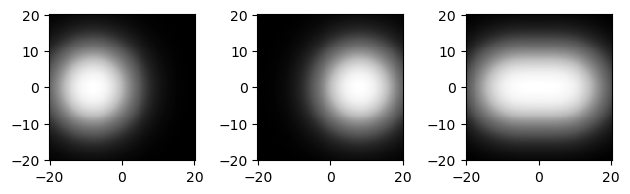

In [131]:
filter1 = polar_gaussian_2d(xs,ys,8,pi)
filter2 = polar_gaussian_2d(xs,ys,8,0)

plt.subplot(1,3,1,aspect=1)
plt.pcolormesh(space, time, filter1, shading='auto',cmap='Greys_r')
plt.subplot(1,3,2,aspect=1)
plt.pcolormesh(space, time, filter2, shading='auto',cmap='Greys_r')
plt.subplot(1,3,3,aspect=1)
plt.pcolormesh(space, time, filter1 + filter2, shading='auto',cmap='Greys_r')
plt.tight_layout()


(150, 150)


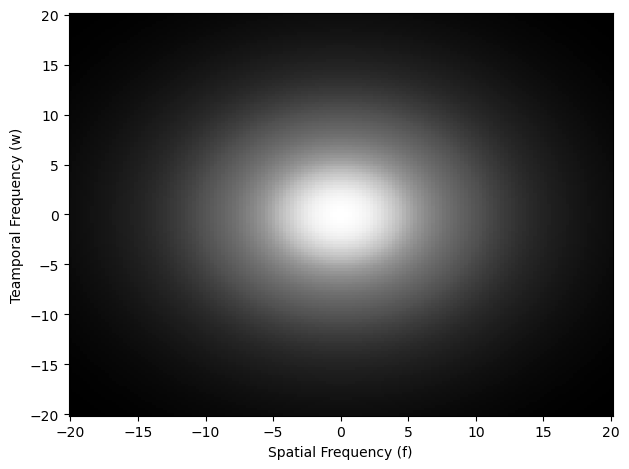

In [117]:
grid = np.zeros((150,150))

for i, orientation in enumerate(orientations):
    for j, scale in enumerate(scales):
        #create filter
        filter = polar_gaussian_2d(xs,ys,scale,orientation)
        #plt.pcolormesh(filter)
        #plt.colorbar()
        #plt.show()
        grid += filter

print(grid.shape)
#plot it
#print(len(orientations),len(scales),i,j,i*len(scales)+j+1)
plt.pcolormesh(space, time, grid, shading='auto',cmap='Greys_r')
plt.xlabel('Spatial Frequency (f)')
plt.ylabel('Teamporal Frequency (w)')
#plt.colorbar()
plt.tight_layout()

In [ ]:
p